In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import cPickle
import numpy as np
import random
from glob import glob

def load_data():
    
    images_array = []
    labels_array = []
    for filepath in glob('datasets/cifar-10-batches-py/data_batch*'):
        f = open(filepath, 'rb')
        dict = cPickle.load(f)
        images = dict['data']
        labels = dict['labels']
        images_array.append(images)
        labels_array.append(labels)
    
    return np.vstack(images_array), np.hstack(labels_array)

In [12]:
images, labels = load_data()
images.shape, labels.shape

((50000L, 3072L), (50000L,))

In [4]:
#plt.imshow(images[0])
images.shape

(50000L, 3072L)

In [5]:
# Width and height of each image.
img_size = 32

# Number of channels in each image, 3 channels: Red, Green, Blue.
num_channels = 3

#Length of an image when flattened to a 1-dim array.
img_size_flat = img_size * img_size * num_channels

# Number of classes.
num_classes = 10

In [6]:
def _convert_images(raw):
    """
    Convert images from the CIFAR-10 format and
    return a 4-dim array with shape: [image_number, height, width, channel]
    where the pixels are floats between 0.0 and 1.0.
    """

    # Convert the raw images from the data-files to floating-points.
    raw_float = np.array(raw, dtype=float) / 255.0

    # Reshape the array to 4-dimensions.
    images = raw_float.reshape([-1, num_channels, img_size, img_size])

    # Reorder the indices of the array.
    images = images.transpose([0, 2, 3, 1])

    return images

In [39]:
img1 = _convert_images(images[0])
#img1
imag = _convert_images(img1[0])
imag.shape

(1L, 32L, 32L, 3L)

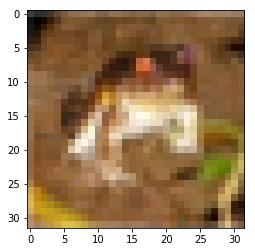

6


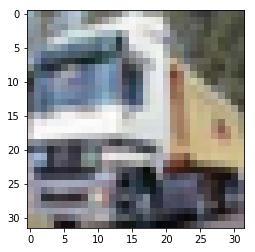

9


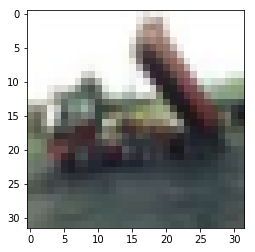

9


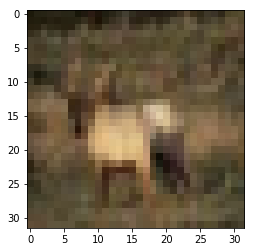

4


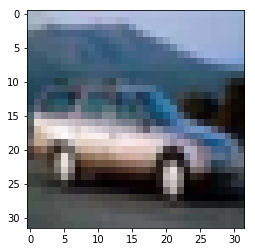

1


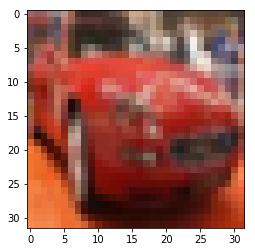

1


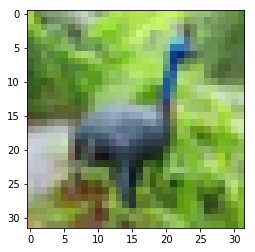

2


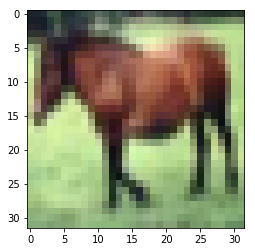

7


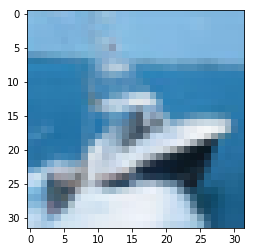

8


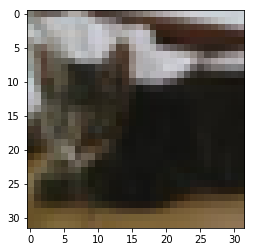

3


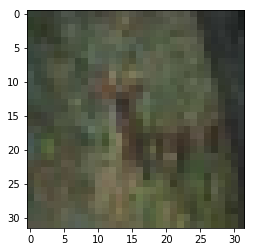

4


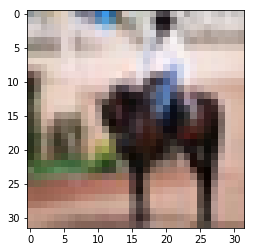

7


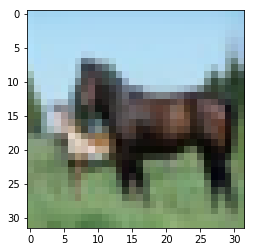

7


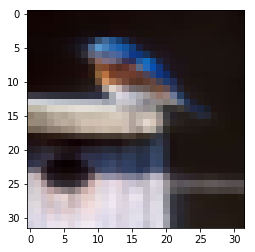

2


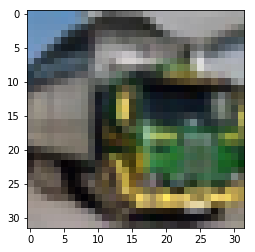

9


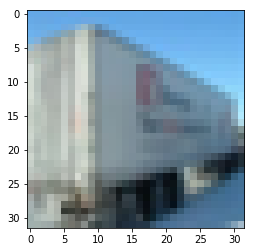

9


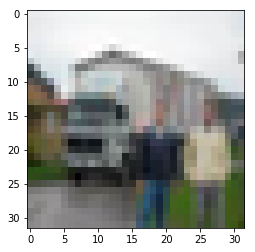

9


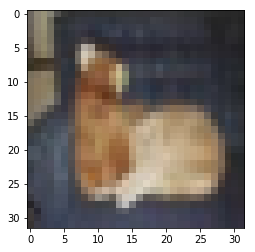

3


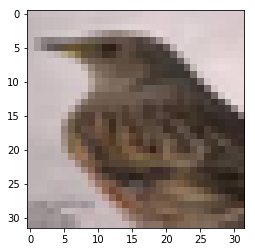

2


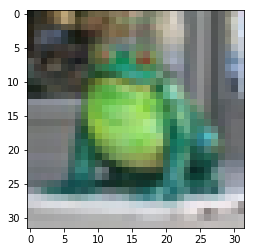

6


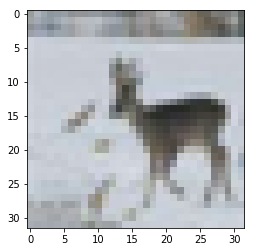

4


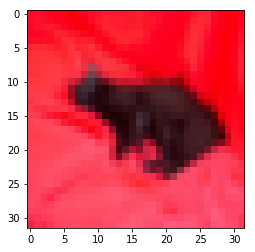

3


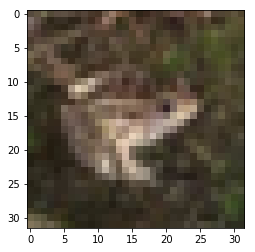

6


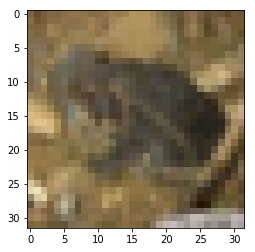

6


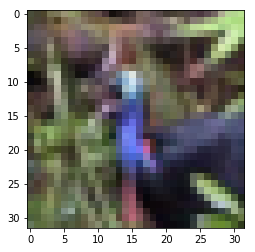

2


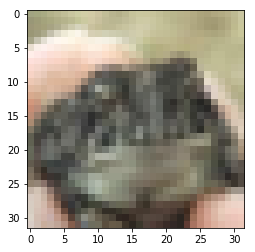

6


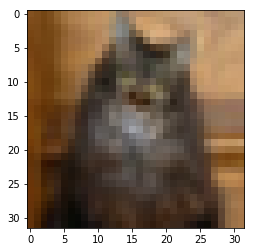

3


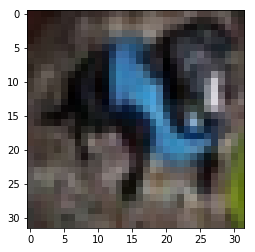

5


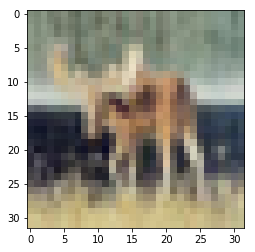

4


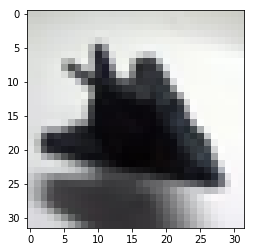

0


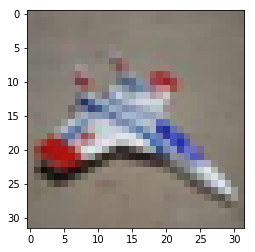

0


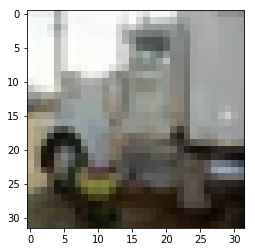

9


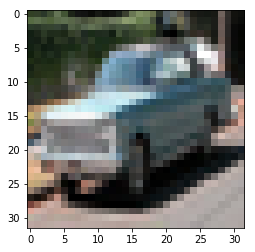

1


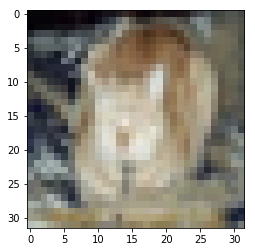

3


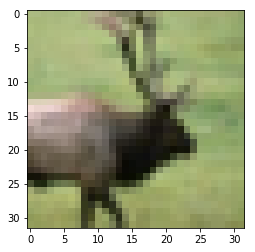

4


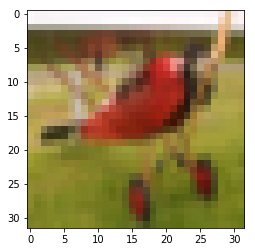

0


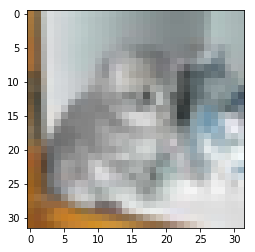

3


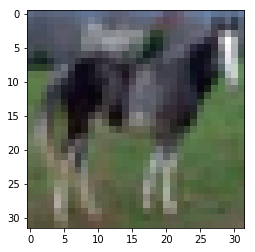

7


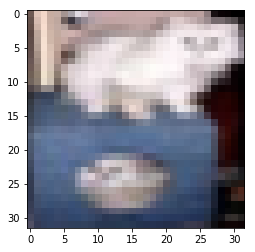

3


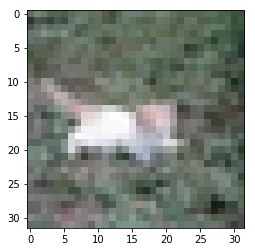

3


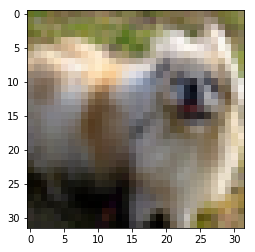

5


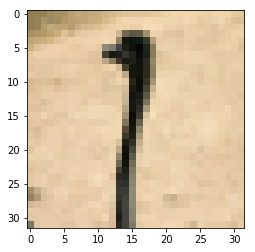

2


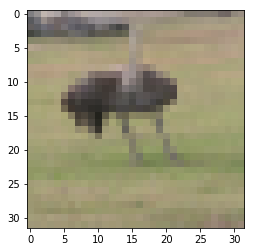

2


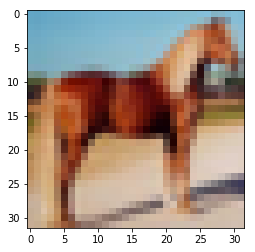

7


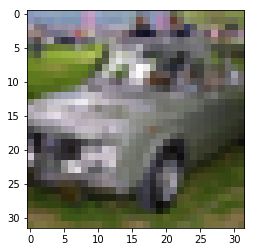

1


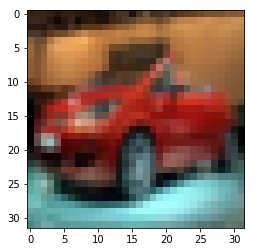

1


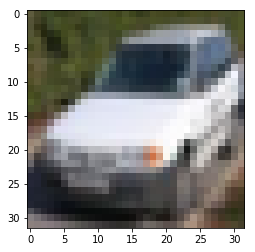

1


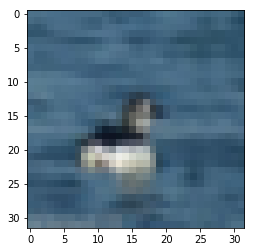

2


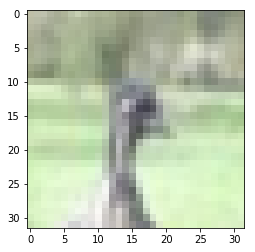

2


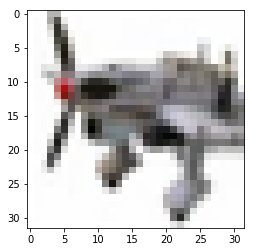

0


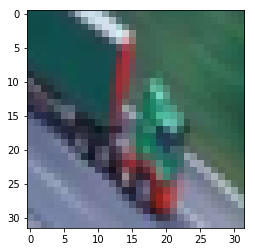

9


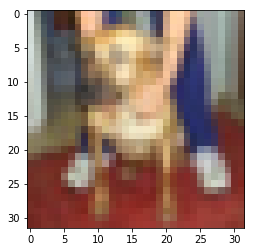

5


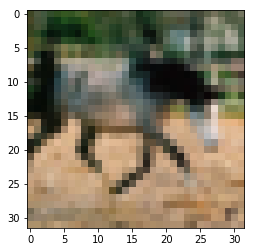

7


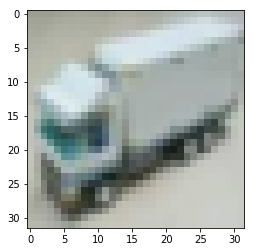

9


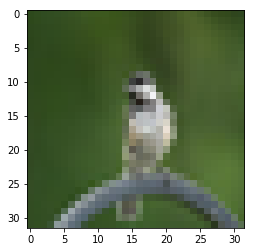

2


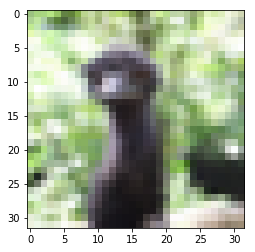

2


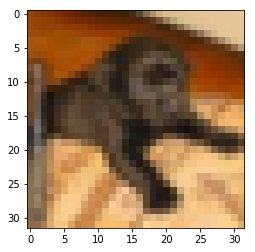

5


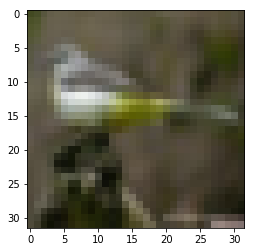

2


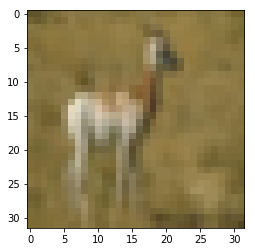

4


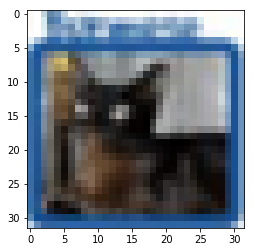

3


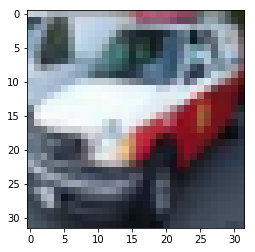

1


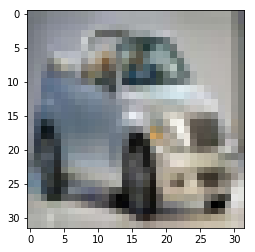

1


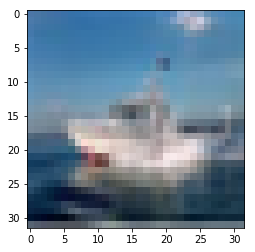

8


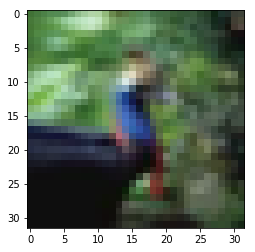

2


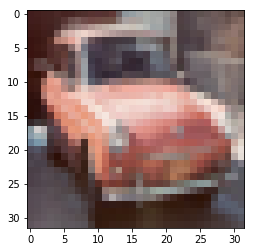

1


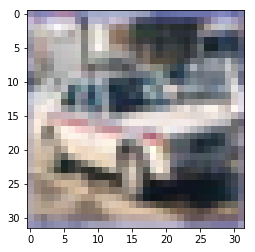

1


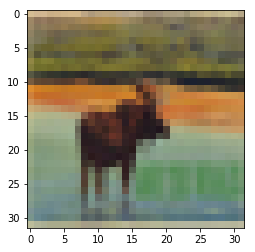

4


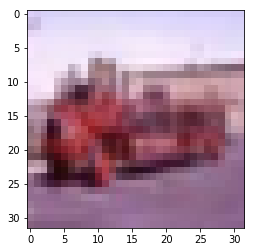

9


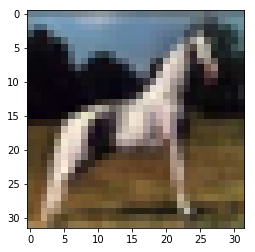

7


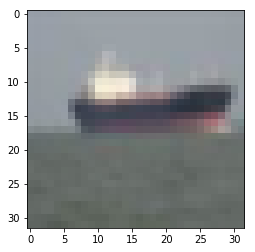

8


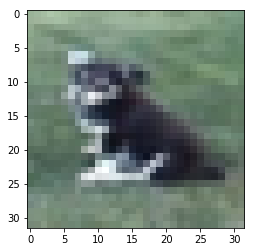

5


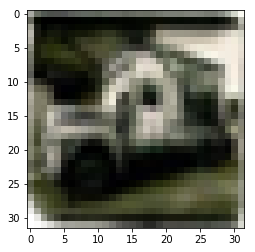

9


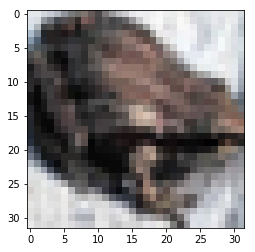

6


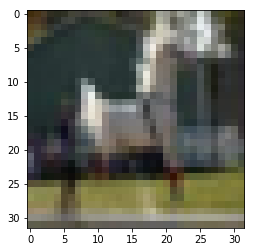

7


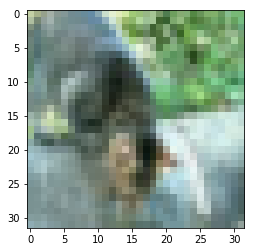

3


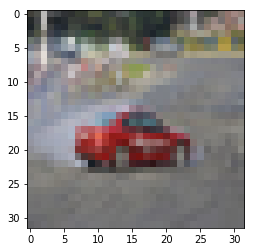

1


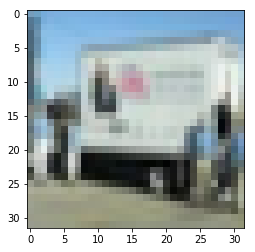

9


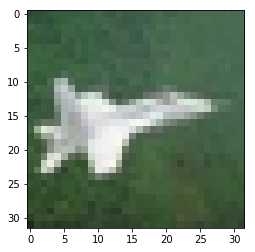

0


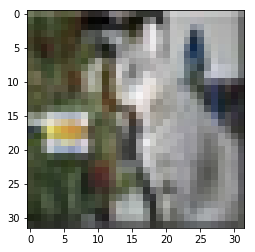

3


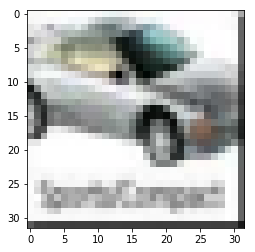

1


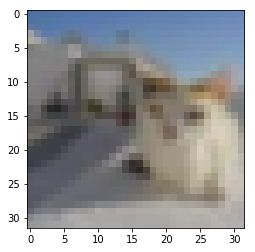

3


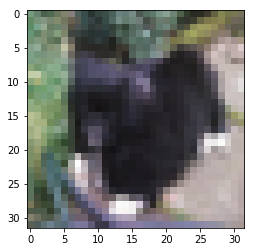

5


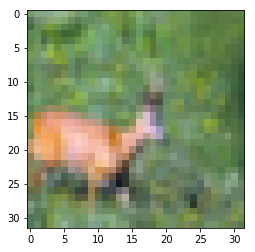

4


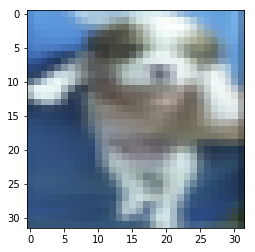

5


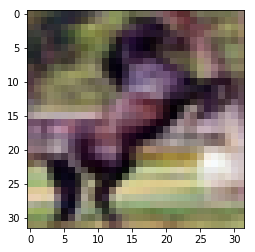

7


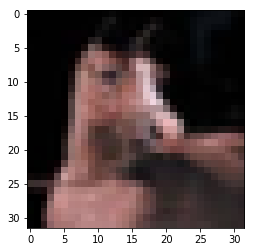

7


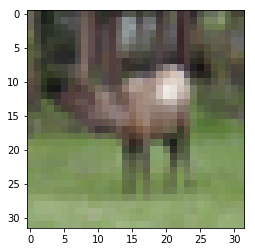

4


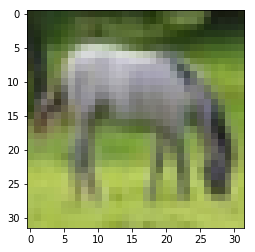

7


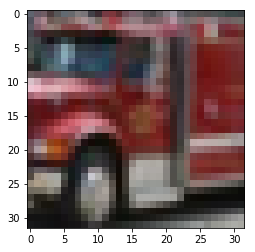

9


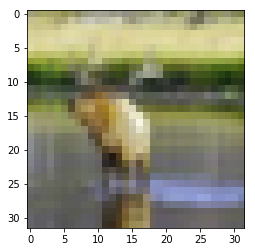

4


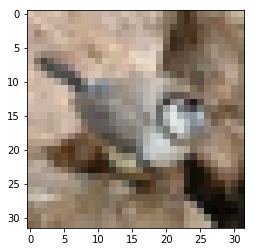

2


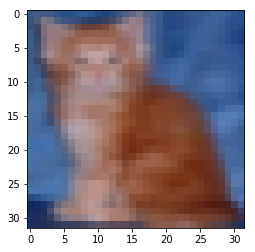

3


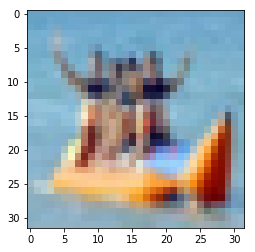

8


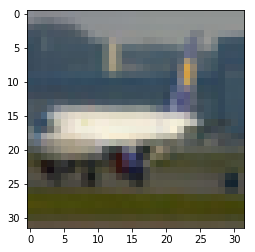

0


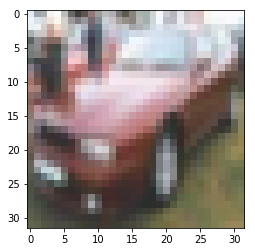

1


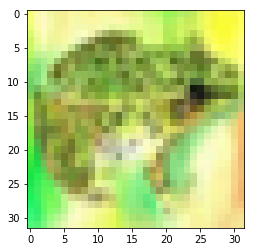

6


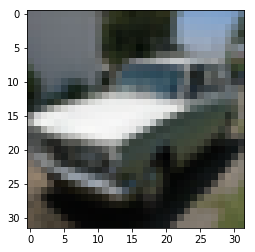

1


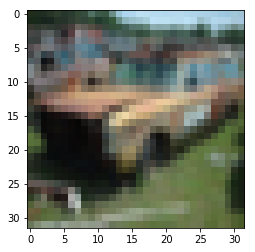

1


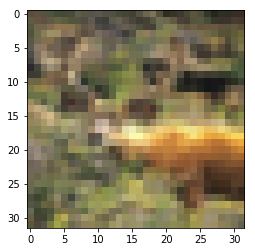

4


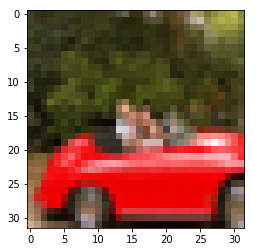

1


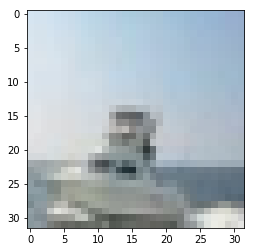

8


In [45]:
contador = 0
index = 0
for i in images:
    img1 = _convert_images(i)    
    plt.imshow(img1[0])
    plt.show()
    contador = contador + 1
    #print contador
    print labels[index]
    index = index + 1
    if contador > 100:
        break





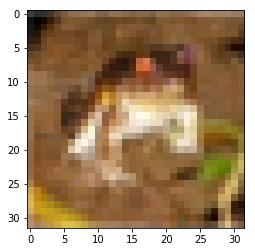

In [34]:
plt.imshow(img1[0])

In [260]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from sklearn.cluster import Birch, DBSCAN, KMeans

from sklearn.metrics import silhouette_score, calinski_harabaz_score

# %matplotlib inline

In [100]:
data = np.genfromtxt('datasets/unlabeled_data.txt', delimiter=' ')

In [101]:
data.shape

(420L, 2L)

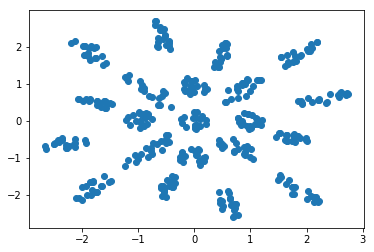

In [102]:
plt.scatter(data[:,0], data[:,1])

In [158]:
colormap = {
    -1:'sienna',
    0:'tomato',
    1:'azure',
    2:'crimson',
    3:'green',
    4:'grey',
    5:'gold',
    6:'indigo',
    7:'lavender',
    8:'lime',
    9:'maroon',
    10:'navy',
    11:'olive',
    12:'orange',
    13:'orchid',
    14:'plum',
    15:'salmon',
    16:'aqua',
    17:'silver',
    18:'tan',
    19:'teal',
    20:'beige',
    21:'violet',
    22:'yellow',
    23:'magenta',
    24:'plum',
    25:'lightblue'
}

<h3>Útil</h3>

In [263]:
def fPrint(out):
    c = [colormap[i] for i in out]
    plt.scatter(data[:,0], data[:, 1], c=c, edgecolors='k')
    
range_de_clusters = [2, 3, 5, 10, 15, 20, 21, 22, 23, 25, 28, 30, 35]

<h3>Kmeans</h3>

In [264]:
def fkmeans(i):
    kmeans = KMeans(n_clusters=i)
    kmeans_out = kmeans.fit_predict(data)
    return kmeans_out

('Quantidade de clusters: ', 21)
('SILHOUETTE Score: ', 0.6673926857402916)
('Calinski Harabaz Score: ', 1128.486306810275)


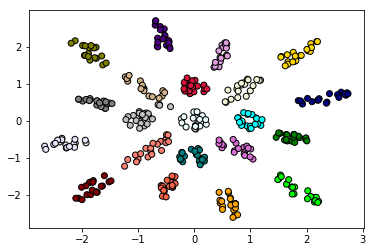

In [275]:
bestS = 0
bestI = 0
bestOut = 0
chOut = 0

for i in range_de_clusters:    
    kmeans_out = fkmeans(i)
    
    s = silhouette_score(data, kmeans_out)    
    ch = calinski_harabaz_score(data,kmeans_out)
    
    if bestS<s:
        bestS=s
        bestI=i
        bestOut = kmeans_out
        chOut = ch
            
    #print('Silhouette score:' , s, ' Clusters: ', i)
    #print('Calinski Harabaz score:' , ch, ' Clusters: ', i)
    

print('Quantidade de clusters: ', bestI)
print('SILHOUETTE Score: ', bestS)
print('Calinski Harabaz Score: ', chOut)

fPrint(bestOut)

<h3>DBSCAN</h3>

In [256]:
def fdbscan():
    dbscan = DBSCAN(eps=0.26)
    dbscan_out = dbscan.fit_predict(data)
    dbscan_fit = dbscan.fit(data)
    return dbscan_out, dbscan_fit

('Melhor quantidade de clusters: ', 21, ' Score: ', 0.6673660152827566)


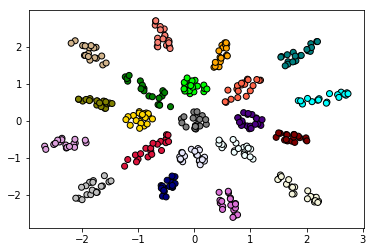

In [257]:
bestOut, dbs = fdbscan()
labels = dbs.labels_
bestI = len(set(labels))
bestS = silhouette_score(data, labels)

print('Melhor quantidade de clusters: ', bestI, ' Score: ', bestS)
fPrint(bestOut)

<h3>Birch</h3>

In [258]:
def fbirch(i):
    birch = Birch(n_clusters=i, branching_factor=2, threshold=0.1)
    birch_pred_groups = birch.fit_predict(data)
    return birch_pred_groups

('Quantidade de clusters: ', 21)
('SILHOUETTE Score: ', 0.6673660152827566)
('Calinski Harabaz Score: ', 1122.806378429912)


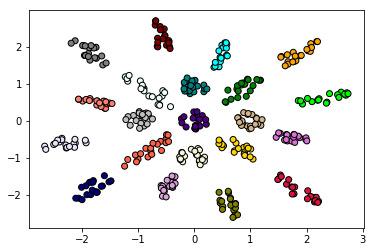

In [276]:
bestS = 0
bestI = 0
bestOut = 0
chOut = 0

for i in range_de_clusters:    
    birch_pred_groups = fbirch(i)
    
    s = silhouette_score(data, birch_pred_groups)
    ch = calinski_harabaz_score(data,birch_pred_groups)
    
    if bestS<s:
        bestS=s
        bestI=i
        bestOut = birch_pred_groups
        chOut = ch
            
    #print('Silhouette score:' , s, ' Clusters: ', i)
    #print('Calinski Harabaz score:' , ch, ' Clusters: ', i)
    

print('Quantidade de clusters: ', bestI)
print('SILHOUETTE Score: ', bestS)
print('Calinski Harabaz Score: ', chOut)

fPrint(bestOut)